## Downloading Dataset

In [1]:
from mit_d3m import load_dataset # Importing Dataset
sick = load_dataset('38_sick') # Loading Dataset

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Dataset Context

In [2]:
sick.context

{'target_entity': 'learningData',
 'entities': {'learningData': (          d3mIndex   age sex on_thyroxine query_on_thyroxine  \
   d3mIndex                                                       
   0                0  41.0   F            f                  f   
   2                2  46.0   M            f                  f   
   3                3  70.0   F            t                  f   
   5                5  18.0   F            t                  f   
   6                6  59.0   F            f                  f   
   ...            ...   ...  ..          ...                ...   
   3766          3766  19.0   F            f                  f   
   3767          3767  30.0   F            f                  f   
   3768          3768  68.0   F            f                  f   
   3769          3769  74.0   F            f                  f   
   3771          3771  64.0   F            f                  f   
   
            on_antithyroid_medication sick pregnant thyroid_sur

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import tabulate

### Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder # Importing Library for Response Variable Encoding
from sklearn.model_selection import train_test_split, KFold, cross_val_score # Importing Library for Splitting the Dataset into Train & Test Set
from imblearn.over_sampling import SMOTE # Importing 'SMOTE' to Handel Imbalance Dataset

### Models

In [58]:
from sklearn.linear_model import LogisticRegression # Importing 'LogistocRegression' Machine Learning Model
from sdv.tabular import GaussianCopula # Importing 'GaussianCoupla' Model
from sdv.tabular import CTGAN # Importing 'CTGAN' Model
from sdv.tabular import CopulaGAN # Importing 'CopulaGAN' Model

### Evaluation Metrics

In [6]:
from sklearn.model_selection import KFold # Importing 'KFold' for Evaluating Model
from sklearn.model_selection import cross_val_score# Importing 'cross_val_score' for Calculating Model Score
from sklearn.metrics import accuracy_score # Importing 'accuracy_score' Class for Model Evaluation 
from numpy import mean, absolute # Importing 'mean' & 'absolute' to Calculate Accuracy Score
from sdv.evaluation import evaluate # Importing 'evaluate' Class for Synthetic Dataset Evaluation

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Removing Warning Messages

In [7]:
warnings.filterwarnings(action = 'ignore') 

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Predictor & Response Variables

In [8]:
X = sick.X # Predictor Variables
y = sick.y # Response Variables

## Data Pre-Processing 

In [9]:
dataset = pd.concat([X,y], axis = 1) # Joining 'X' & 'y' in a Single Data Frame
dataset.isnull().sum() # Printing Total 'NULL' Values in the Dataset

d3mIndex                        0
age                             1
sex                           125
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           295
T3_measured                     0
T3                            604
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           326
FTI_measured                    0
FTI                           324
TBG_measured                    0
TBG                          3018
referral_sourc

### Removing Empty Values

In [10]:
dataset = dataset.drop(['d3mIndex','TBG'], axis = 1) # Dropping Empty Columns
dataset = dataset.drop([1364], axis = 0)
dataset = dataset.dropna(inplace = False) # Removing All 'NULL' Values
dataset.isnull().sum() # Printing the Results

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64

### Extracting Predictor & Response Variable 

In [11]:
X = dataset.iloc[:, :-1] # Extracting Predictor Variables
y = pd.DataFrame(dataset.iloc[:, -1]) # Extracting Response Variables

### Checking Class Imbalance

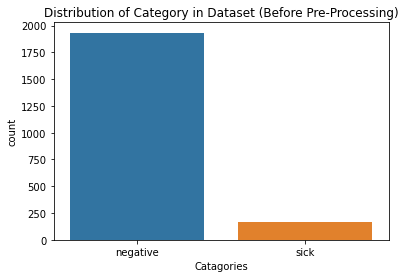

In [12]:
before = y # Converting Response Variable into a Dataframe
before.columns = ['Catagories'] # Giving Column Name 

sns.countplot(x = 'Catagories', data = before) # Plotting The Count Graph
plt.title('Distribution of Category in Dataset (Before Pre-Processing)') # Giving Title To The Graph
plt.show() # Showing The Graph

### Encoding

In [13]:
X = np.array(pd.get_dummies(X)) # Encoding Predictor Varaiables

response_encode = LabelEncoder() # Initializing 'LabelEncoder()' for Encoding Response Variable
y = np.array(response_encode.fit_transform(y)) # Encoding Response Variable

In [14]:
display(X) # Printing the Encoded Predictor Variables

array([[41. ,  1.3,  2.5, ...,  0. ,  0. ,  0. ],
       [66. ,  0.6,  2.2, ...,  0. ,  1. ,  0. ],
       [68. ,  2.4,  1.6, ...,  0. ,  1. ,  0. ],
       ...,
       [68. ,  1. ,  2.1, ...,  0. ,  1. ,  0. ],
       [74. ,  5.1,  1.8, ...,  0. ,  0. ,  1. ],
       [64. ,  1. ,  2.2, ...,  0. ,  0. ,  1. ]])

In [15]:
display(y) # Printing the Encoded Response Variable

array([0, 0, 0, ..., 0, 0, 0])

### Balancing Dataset

In [16]:
smote = SMOTE() # Applying Synthteic Minority Oversampling Technique to Balance the Dataset
X, y = smote.fit_resample(X, y) # Applying the Model

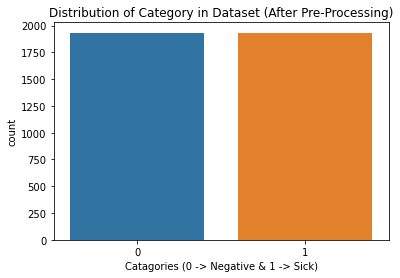

In [17]:
after = pd.DataFrame(y) # Converting Response Variable into a Dataframe
after.columns = ['Catagories (0 -> Negative & 1 -> Sick)'] # Giving Column Name

sns.countplot(x = 'Catagories (0 -> Negative & 1 -> Sick)', data = after) # Plotting The Count Graph
plt.title('Distribution of Category in Dataset (After Pre-Processing)') # Giving Title To The Graph
plt.show() # Showing The Graph

### Training & Test Set Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## XG Boost Classification Model

In [59]:
model = LogisticRegression() # Initializing the Classification Model
model.fit(X_train, y_train) # Traing the Model on Original Datapoints

LogisticRegression()

### Evaluating Model

In [60]:
cv = KFold(n_splits=10, random_state = 1, shuffle = True) # Defining Cross-Validation Method 

scores = cross_val_score(model, X, y, cv = cv, n_jobs = -1) # Evaluating the Model
print('Average Accuracy of the Model -> ', round(mean(absolute(scores)) * 100), '%') # Printing Results

Average Accuracy of the Model ->  91 %


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx** 

## Exploratory Data Analysis

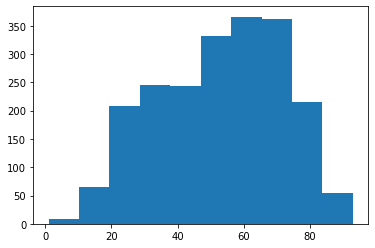

In [21]:
age = pd.DataFrame(dataset.age) # Extracting 'age' Data from the Dataset

plt.hist(age, bins = 10) # Histogram
plt.show() # Displaying the Plot

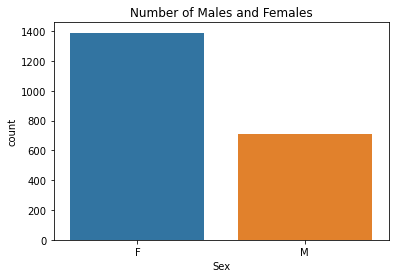

In [22]:
sex = pd.DataFrame(dataset.sex) # Extracting 'sex' Data from the Dataset
sex.columns = ['Sex'] # Giving Column Name

sns.countplot(x = 'Sex', data = sex) # Plotting The Count Graph
plt.title('Number of Males and Females') # Giving Title To The Graph
plt.show() # Showing The Graph

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Synthetic Data Instances

### Gaussian Copula Model

In [ ]:
syn_model = GaussianCopula() # Initializing the Model
syn_model.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model.save('Saved Model/Gaussian.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [23]:
gaussian = GaussianCopula.load('Saved Model/Gaussian.pkl')

In [24]:
syn_data = gaussian.sample(num_rows = 200) # Generating Synthetic Data
syn_data # Printing the Generated Data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,76.0,F,f,f,f,t,f,f,f,f,...,1.89,t,143.1,t,1.036,t,148.5,f,SVI,negative
1,79.0,F,f,f,f,f,f,f,f,f,...,1.90,t,87.3,t,0.828,t,103.5,f,SVI,negative
2,42.0,F,t,f,f,f,f,f,f,f,...,3.10,t,158.9,t,1.235,t,135.7,f,SVHC,sick
3,58.0,M,f,t,f,f,f,f,f,f,...,2.42,t,142.4,t,0.881,t,161.3,f,SVHC,negative
4,37.0,M,t,f,f,f,t,f,f,f,...,2.88,t,115.5,t,0.766,t,150.8,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,80.0,M,f,f,f,f,f,f,f,f,...,1.86,t,140.8,t,0.775,t,172.5,f,SVI,sick
196,76.0,F,f,f,f,f,f,f,f,f,...,1.37,t,85.6,t,0.712,t,107.5,f,SVHD,negative
197,70.0,M,f,f,f,f,f,t,f,f,...,2.75,t,151.3,t,0.973,t,154.6,f,SVI,negative
198,37.0,M,t,f,t,f,f,f,f,f,...,1.69,t,132.6,t,1.039,t,130.2,f,other,negative


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [25]:
syn_X = syn_data.iloc[:, :-1] # Predictor Variable
syn_y = syn_data.iloc[:, -1] # Response Variable

##### Encoding

In [26]:
syn_X = np.array(pd.get_dummies(syn_X)) # Encoding Predictor Varaiables
syn_y = np.array(response_encode.fit_transform(syn_y)) # Encoding  Varaiables

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [61]:
syn_acc = model.predict(syn_X) # Prediction
print("Accuracy of the Model on Synthetic Data Test Set-> ", round(accuracy_score(syn_acc, syn_y)*100), "%") # Average Accuracy Score of the Model

Accuracy of the Model on Synthetic Data Test Set->  74 %


Statistical Metrics

In [28]:
general_evaluation = evaluate(syn_data, dataset) # Evaluating on All Metrics
CS_test = evaluate(syn_data, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test = evaluate(syn_data, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [29]:
evaluation = [general_evaluation, CS_test, KS_test] # Creating a List of the Results
evaluation = pd.DataFrame(evaluation) # Creating a Data Frame of the Results
evaluation.columns = ['Results'] # Gicing Column Name
evaluation.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.580477
Chi-Squared Test,0.751432
Inverted Kolmogorov-Smirnov Test,0.790503


In [30]:
p_CS_test = 1-CS_test # Calculating 'p-value' for Chi-Squared Test
p_KS_test = 1-KS_test # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [31]:
p_value = [p_CS_test, p_KS_test] # Creating a List of the Results
p_value = pd.DataFrame(p_value) # Creating a Data Frame of the Results
p_value.columns = ['P Values'] # Gicing Column Name
p_value.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.248568
Inverted Kolmogorov-Smirnov P Value,0.209497


#### Exploratory Data Analysis

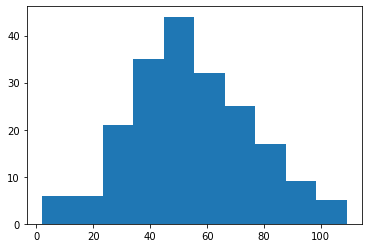

In [32]:
syn_age = pd.DataFrame(syn_data.age) # Extracting 'age' Data from the Dataset

plt.hist(syn_age, bins = 10) # Histogram
plt.show() # Displaying the Plot

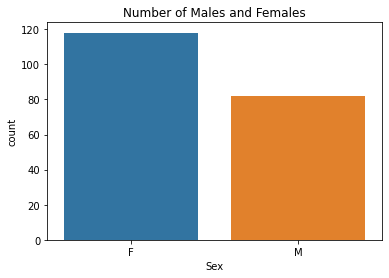

In [33]:
syn_sex = pd.DataFrame(syn_data.sex)
syn_sex.columns = ['Sex']

sns.countplot(x = 'Sex', data = syn_sex) # Plotting The Count Graph
plt.title('Number of Males and Females') # Giving Title To The Graph
plt.show() # Showing The Graph

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

### CT GAN

In [ ]:
syn_model2 = CTGAN() # Initializing the Model
syn_model2.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model2.save('Saved Model/CT_GAN.pkl') 

#### Loading The Saved Synthetic Data Generator Model

In [34]:
ct_gan = CTGAN.load('Saved Model/CT_GAN.pkl')

In [35]:
syn_data2 = ct_gan.sample(num_rows = 2013) # Generating Synthetic Data
syn_data2 # Printing Generated Data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,80.0,F,f,f,f,f,t,f,f,f,...,1.70,t,71.9,t,0.975,t,117.6,f,SVHC,negative
1,61.0,F,f,f,f,f,f,f,f,f,...,1.15,t,129.8,t,0.883,t,109.6,f,STMW,negative
2,39.0,M,f,f,f,t,f,f,f,f,...,3.18,t,136.0,t,1.724,t,75.3,f,SVHC,negative
3,100.0,F,f,f,f,f,f,t,f,f,...,2.91,t,80.2,t,0.935,t,105.7,f,other,negative
4,54.0,M,f,f,f,f,f,f,f,f,...,3.24,t,126.9,t,0.746,t,25.6,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,12.0,F,f,f,f,f,f,f,f,f,...,1.27,t,226.1,t,0.917,t,75.6,f,SVHC,negative
2009,11.0,F,f,f,f,f,f,f,f,f,...,2.41,t,103.0,t,1.591,t,59.3,f,other,negative
2010,13.0,M,f,f,f,f,f,f,f,f,...,3.62,t,110.9,t,0.631,t,59.7,f,SVI,negative
2011,62.0,F,t,f,f,f,f,f,f,f,...,2.92,t,139.5,t,0.654,t,63.7,f,SVI,negative


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [36]:
syn_X2 = syn_data2.iloc[:, :-1] # Predictor Variable
syn_y2 = syn_data2.iloc[:, -1] # Response Variable

##### Encoding

In [37]:
syn_X2 = np.array(pd.get_dummies(syn_X2)) # Encoding Predictor Varaiables
syn_y2 = np.array(response_encode.fit_transform(syn_y2)) # Encoding  Varaiables

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [62]:
syn2_acc = model.predict(syn_X2) # Prediction
print("Average Accuracy of the Model-> ", round(accuracy_score(syn2_acc, syn_y2)*100), "%") # Average Accuracy Score of the Model

Average Accuracy of the Model->  84 %


Statistical Metrics

In [39]:
general_evaluation2 = evaluate(syn_data2, dataset) # Evaluating on All Metrics
CS_test2 = evaluate(syn_data2, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test2 = evaluate(syn_data2, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [40]:
evaluation2 = [general_evaluation2, CS_test2, KS_test2] # Creating a List of the Results
evaluation2 = pd.DataFrame(evaluation2) # Creating a Data Frame of the Results
evaluation2.columns = ['Results'] # Gicing Column Name
evaluation2.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.604864
Chi-Squared Test,0.906701
Inverted Kolmogorov-Smirnov Test,0.742281


In [41]:
p_CS_test2 = 1-CS_test2 # Calculating 'p-value' for Chi-Squared Test
p_KS_test2 = 1-KS_test2 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [42]:
p_value2 = [p_CS_test2, p_KS_test2] # Creating a List of the Results
p_value2 = pd.DataFrame(p_value2) # Creating a Data Frame of the Results
p_value2.columns = ['P Values'] # Gicing Column Name
p_value2.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.093299
Inverted Kolmogorov-Smirnov P Value,0.257719


#### Exploratory Data Analysis

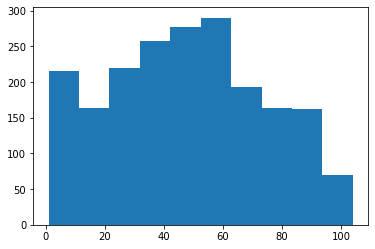

In [43]:
syn_age2 = pd.DataFrame(syn_data2.age) # Extracting 'age' Data from the Dataset

plt.hist(syn_age2, bins = 10) # Histogram
plt.show() # Displaying the Plot

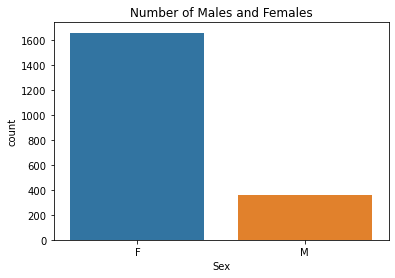

In [44]:
syn_sex2 = pd.DataFrame(syn_data2.sex) # Extracting 'sex' Data from the Dataset
syn_sex2.columns = ['Sex'] # Giving Column Name

sns.countplot(x = 'Sex', data = syn_sex2) # Plotting The Count Graph
plt.title('Number of Males and Females') # Giving Title To The Graph
plt.show() # Showing The Graph

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

### Copula GAN 

In [ ]:
syn_model3 = CopulaGAN() # Initializing the Model
syn_model3.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model3.save('Saved Model/Copula_GAN.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [45]:
copula = CopulaGAN.load('Saved Model/Copula_GAN.pkl')

In [46]:
syn_data3 = copula.sample(num_rows = 204) # Generating Synthetic Data
syn_data3 # Printing Generated Data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,51.0,F,f,f,f,t,f,f,f,f,...,2.35,t,146.4,t,0.871,t,82.6,f,SVHC,negative
1,66.0,F,f,f,f,t,t,f,f,f,...,2.51,t,134.8,t,1.096,t,93.5,f,other,negative
2,42.0,M,f,t,f,f,f,f,f,t,...,2.36,t,122.6,t,1.106,t,139.0,f,SVHC,sick
3,42.0,M,f,f,f,f,f,t,f,f,...,1.29,t,125.9,t,0.895,t,86.6,f,SVHC,negative
4,63.0,F,f,f,f,f,f,f,f,f,...,4.42,t,91.9,t,0.948,t,125.2,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,42.0,F,f,f,t,f,t,f,f,f,...,2.83,t,100.3,t,1.472,t,99.6,f,SVI,negative
200,50.0,F,t,f,f,f,f,f,f,f,...,6.83,t,174.5,t,0.821,t,92.0,f,STMW,negative
201,49.0,F,f,f,t,f,f,f,f,f,...,1.41,t,339.2,t,1.003,t,155.5,f,SVI,negative
202,52.0,M,t,f,f,t,f,f,f,f,...,2.77,t,145.0,t,1.783,t,194.1,f,other,negative


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [47]:
syn_X3 = syn_data3.iloc[:, :-1] # Predictor Variable
syn_y3 = syn_data3.iloc[:, -1] # Response Variable

##### Encoding

In [48]:
syn_X3 = np.array(pd.get_dummies(syn_X3)) # Encoding Predictor Varaiables
syn_y3 = np.array(response_encode.fit_transform(syn_y3)) # Encoding  Varaiables

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [66]:
syn3_acc = model.predict(syn_X3) # Prediction
print("Average Accuracy of the Model-> ", round(accuracy_score(syn3_acc, syn_y3)*100), "%") # Average Accuracy Score of the Model

Average Accuracy of the Model->  79 %


Statistical Metrics

In [50]:
general_evaluation3 = evaluate(syn_data3, dataset) # Evaluating on All Metrics
CS_test3 = evaluate(syn_data3, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test3 = evaluate(syn_data3, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [51]:
evaluation3 = [general_evaluation3, CS_test3, KS_test3] # Creating a List of the Results
evaluation3 = pd.DataFrame(evaluation3) # Creating a Data Frame of the Results
evaluation3.columns = ['Results'] # Gicing Column Name
evaluation3.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.448113
Chi-Squared Test,0.587050
Inverted Kolmogorov-Smirnov Test,0.719944


In [52]:
p_CS_test3 = 1-CS_test3 # Calculating 'p-value' for Chi-Squared Test
p_KS_test3 = 1-KS_test3 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [53]:
p_value3 = [p_CS_test3, p_KS_test3] # Creating a List of the Results
p_value3 = pd.DataFrame(p_value3) # Creating a Data Frame of the Results
p_value3.columns = ['P Values'] # Gicing Column Name
p_value3.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.412950
Inverted Kolmogorov-Smirnov P Value,0.280056


#### Exploratory Data Analysis

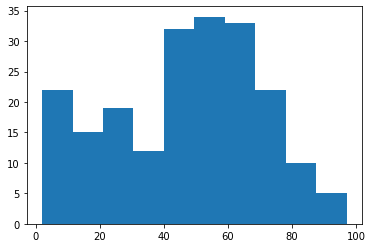

In [54]:
syn_age3 = pd.DataFrame(syn_data3.age) # Extracting 'age' Data from the Dataset

plt.hist(syn_age3, bins = 10) # Histogram
plt.show() # Displaying the Plot

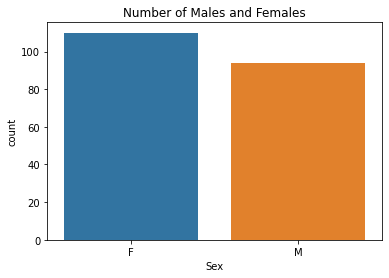

In [55]:
syn_sex3 = pd.DataFrame(syn_data3.sex) # Extracting 'sex' Data from the Dataset
syn_sex3.columns = ['Sex'] # Giving Column Name

sns.countplot(x = 'Sex', data = syn_sex3) # Plotting The Count Graph
plt.title('Number of Males and Females') # Giving Title To The Graph
plt.show() # Showing The Graph

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**